In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [2]:
df=pd.read_csv('/content/Walmart.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [7]:
display(df.head())
display(df.info())
display(df.isnull().sum())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


None

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
display(df['Date'].dtype)

dtype('<M8[ns]')

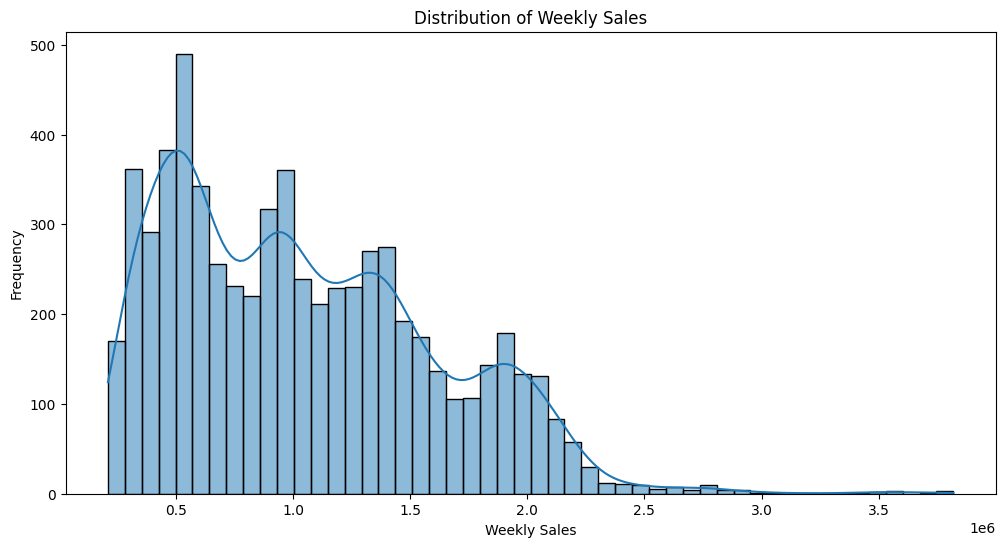

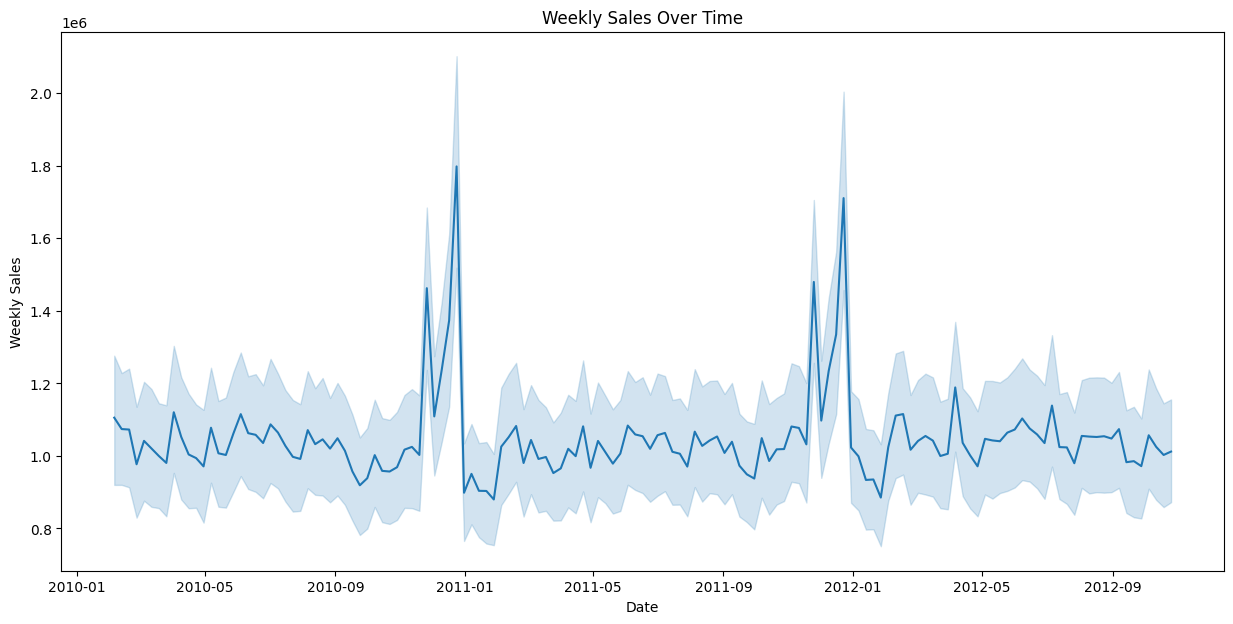

,Weekly_Sales
count,6.435000e+03
mean,1.046965e+06
std,5.643666e+05
min,2.099862e+05
25%,5.533501e+05
50%,9.607460e+05
75%,1.420159e+06
max,3.818686e+06


In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(15, 7))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

weekly_sales_description = df['Weekly_Sales'].describe()
display(weekly_sales_description)

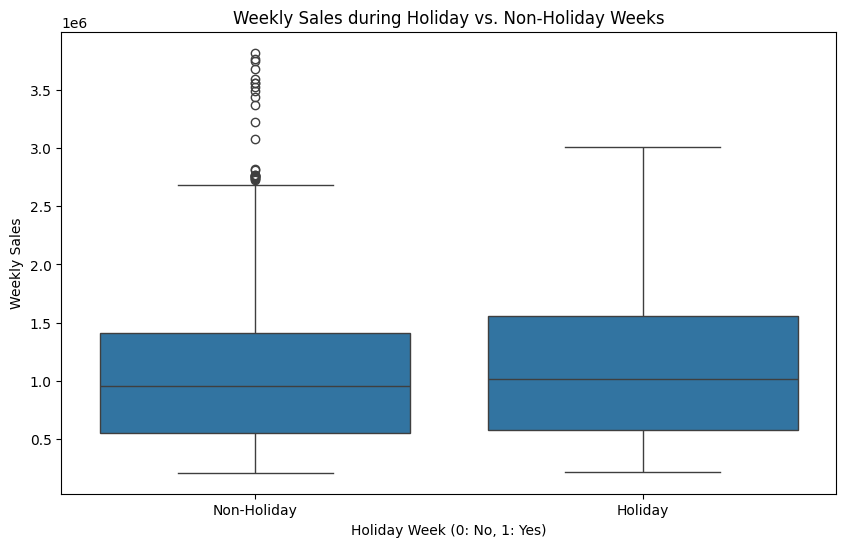

,Weekly_Sales
Holiday_Flag,
0,1.041256e+06
1,1.122888e+06


In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Weekly Sales during Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday Week (0: No, 1: Yes)')
plt.ylabel('Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

average_sales_by_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
display(average_sales_by_holiday)

In [11]:
# Identify major holidays based on common US holidays and the dataset time frame
super_bowl_dates = ['2010-02-12', '2011-02-11', '2012-02-10']
labor_day_dates = ['2010-09-10', '2011-09-09', '2012-09-07']
thanksgiving_dates = ['2010-11-26', '2011-11-25', '2012-11-23']
christmas_dates = ['2010-12-24', '2011-12-23', '2012-12-21'] # Note: Sales impact is often in the week leading up to Christmas

holiday_dates = super_bowl_dates + labor_day_dates + thanksgiving_dates + christmas_dates

# Convert holiday dates to datetime objects for comparison
holiday_dates_dt = pd.to_datetime(holiday_dates)

# Filter the DataFrame for rows where 'Date' is in the list of holiday dates
holiday_sales = df[df['Date'].isin(holiday_dates_dt)]

print("Weekly Sales during Major Holiday Weeks:")
display(holiday_sales[['Date', 'Weekly_Sales', 'Holiday_Flag']])

# Analyze sales around Thanksgiving and Christmas specifically, as they often show significant spikes
thanksgiving_sales = df[df['Date'].isin(pd.to_datetime(thanksgiving_dates))]
christmas_sales = df[df['Date'].isin(pd.to_datetime(christmas_dates))]

print("\nWeekly Sales during Thanksgiving Weeks:")
display(thanksgiving_sales[['Date', 'Weekly_Sales', 'Holiday_Flag']])

print("\nWeekly Sales during Christmas Weeks:")
display(christmas_sales[['Date', 'Weekly_Sales', 'Holiday_Flag']])

Weekly Sales during Major Holiday Weeks:


,Date,Weekly_Sales,Holiday_Flag
1,2010-02-12,1641957.44,1
31,2010-09-10,1507460.69,1
42,2010-11-26,1955624.11,1
46,2010-12-24,2387950.20,0
53,2011-02-11,1649614.93,1
...,...,...,...
6375,2011-09-09,746129.56,1
6386,2011-11-25,1170672.94,1
6390,2011-12-23,1521957.99,0
6397,2012-02-10,803657.12,1



Weekly Sales during Thanksgiving Weeks:


,Date,Weekly_Sales,Holiday_Flag
42,2010-11-26,1955624.11,1
94,2011-11-25,2033320.66,1
185,2010-11-26,2658725.29,1
237,2011-11-25,2614202.30,1
328,2010-11-26,565567.84,1
...,...,...,...
6100,2011-11-25,669965.22,1
6191,2010-11-26,307646.50,1
6243,2011-11-25,309129.01,1
6334,2010-11-26,1182500.16,1



Weekly Sales during Christmas Weeks:


,Date,Weekly_Sales,Holiday_Flag
46,2010-12-24,2387950.20,0
98,2011-12-23,2270188.99,0
189,2010-12-24,3436007.68,0
241,2011-12-23,3224369.80,0
332,2010-12-24,605990.41,0
...,...,...,...
6104,2011-12-23,676290.46,0
6195,2010-12-24,365098.24,0
6247,2011-12-23,376233.89,0
6338,2010-12-24,1682862.03,0


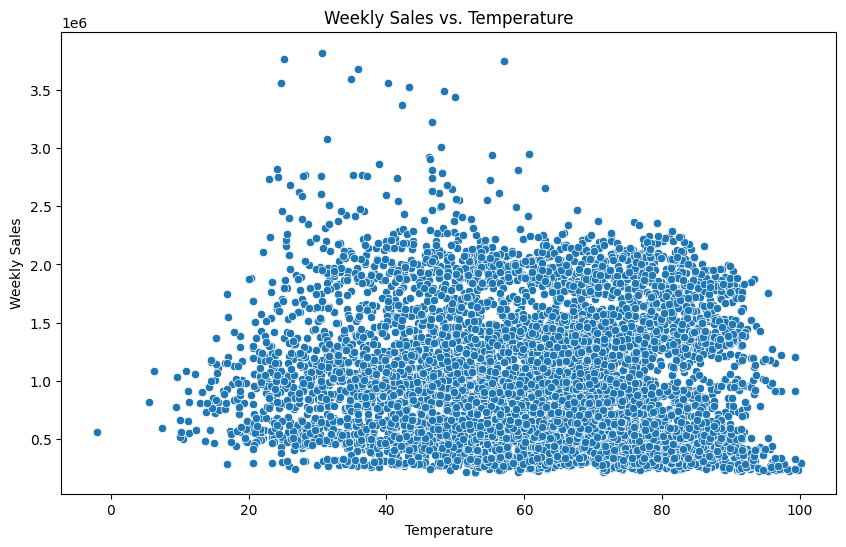

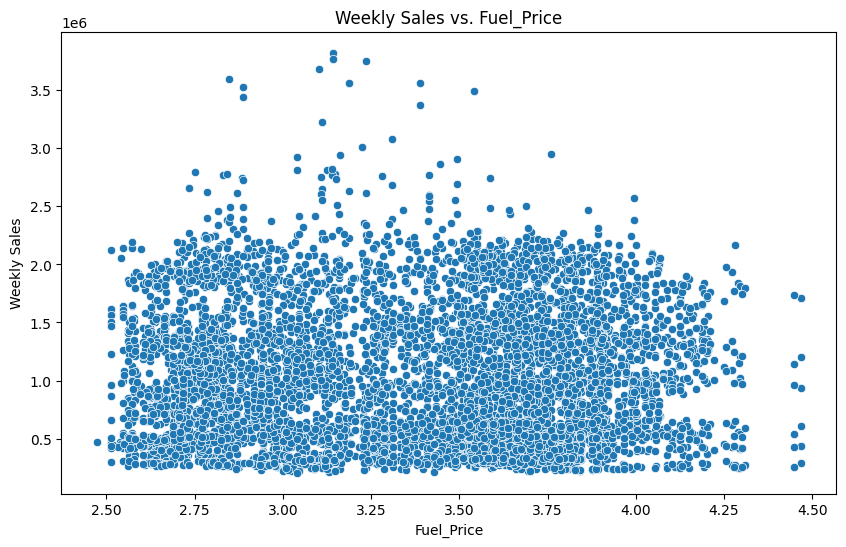

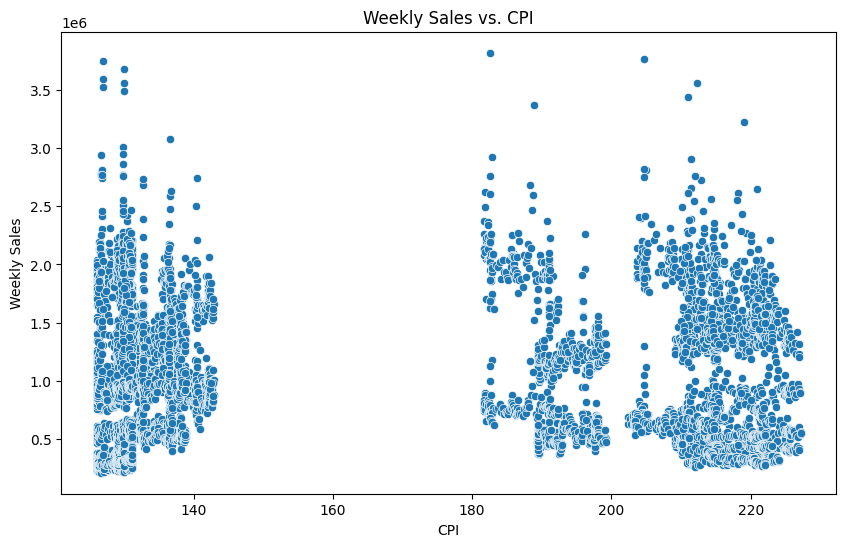

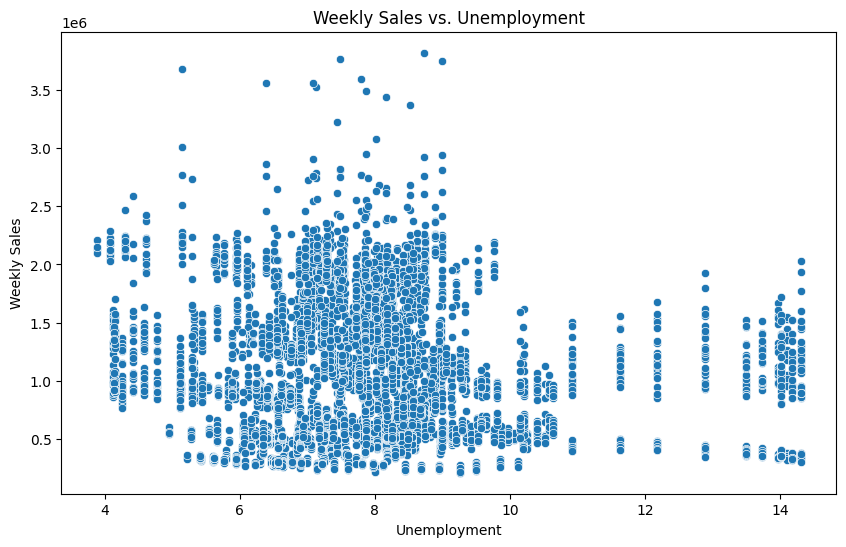

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


In [12]:
environmental_factors = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for factor in environmental_factors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=factor, y='Weekly_Sales', data=df)
    plt.title(f'Weekly Sales vs. {factor}')
    plt.xlabel(factor)
    plt.ylabel('Weekly Sales')
    plt.show()

correlation_matrix = df[['Weekly_Sales'] + environmental_factors].corr()
display(correlation_matrix)

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


/tmp/ipython-input-1460823997.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.index, y=store_sales.values, palette='viridis')


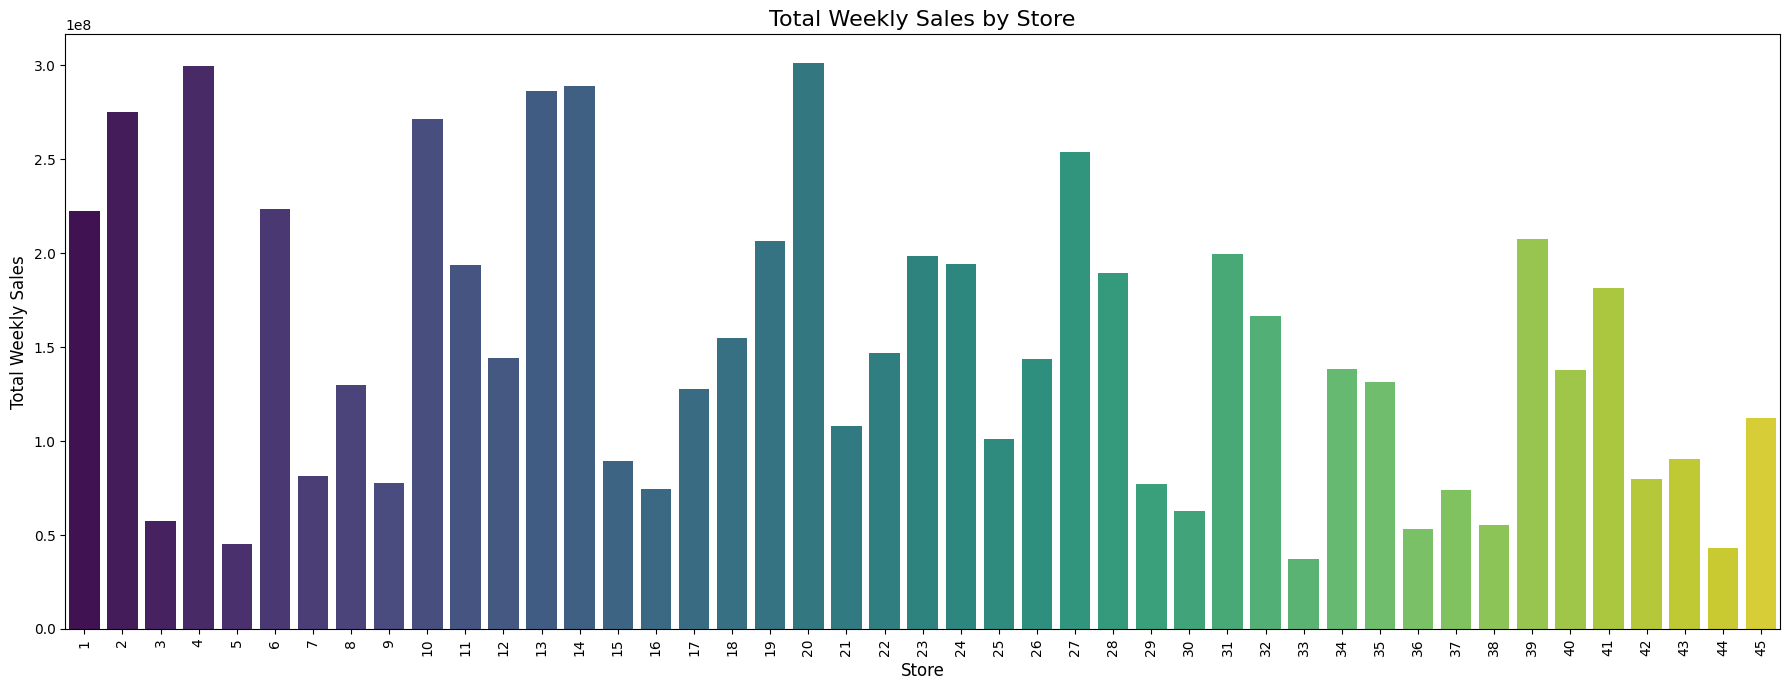

In [13]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
display(store_sales.head(10))

plt.figure(figsize=(18, 7))
sns.barplot(x=store_sales.index, y=store_sales.values, palette='viridis')
plt.title('Total Weekly Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Weekly Sales', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The distribution of weekly sales is right-skewed, with most sales figures concentrated at the lower end.
*   Weekly sales show clear trends and seasonality over time, with noticeable peaks around certain periods.
*   The mean weekly sales is approximately \$1,046,965, with a standard deviation of around \$564,366.
*   Holiday weeks tend to have higher weekly sales compared to non-holiday weeks.
*   Specific major holidays like Thanksgiving and Christmas often show significant spikes in sales.
*   There are weak negative correlations between Weekly Sales and Temperature, CPI, and Unemployment.
*   There is a very weak positive correlation between Weekly Sales and Fuel Price.
*   Store 20 had the highest total weekly sales, followed by Store 4 and Store 14.
*   Weekly sales performance varies significantly across different stores.

### Insights or Next Steps

*   Further investigation into the seasonality observed in weekly sales could help in forecasting future sales trends.
*   Analyzing the specific characteristics or locations of the top-performing stores could provide insights into factors contributing to higher sales.


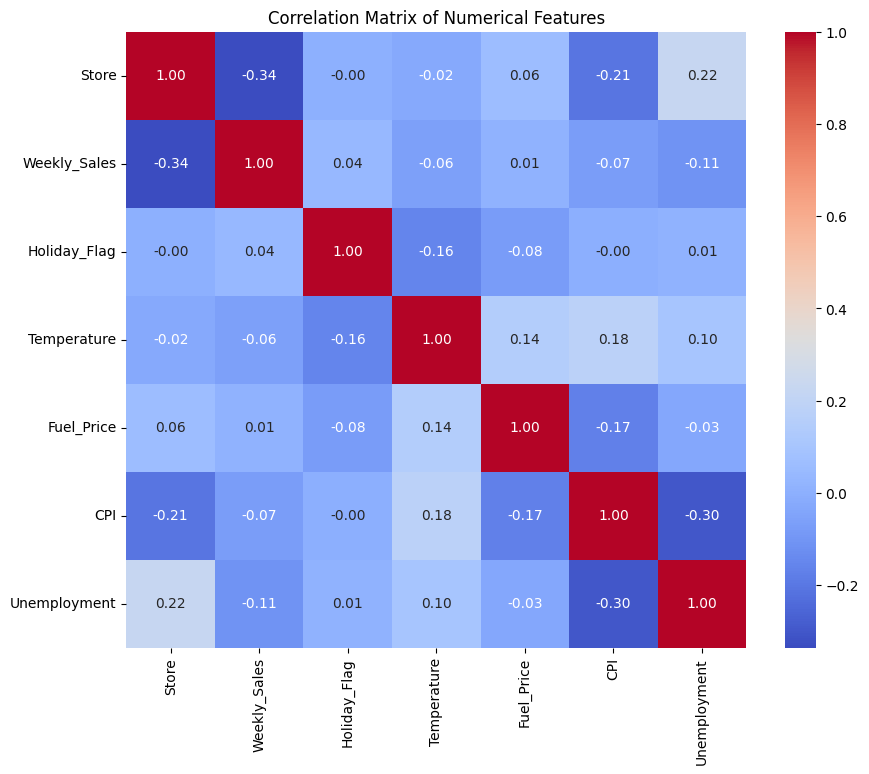

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Summary:

### Data Analysis Key Findings

* The distribution of weekly sales is right-skewed, with most sales figures concentrated at the lower end.
* Weekly sales show clear trends and seasonality over time, with noticeable peaks around certain periods.
* The mean weekly sales is approximately \$1,046,965, with a standard deviation of around \$564,366.
* Holiday weeks tend to have higher weekly sales compared to non-holiday weeks.
* Specific major holidays like Thanksgiving and Christmas often show significant spikes in sales.
* There are weak negative correlations between Weekly Sales and Temperature, CPI, and Unemployment.
* There is a very weak positive correlation between Weekly Sales and Fuel Price.
* Store 20 had the highest total weekly sales, followed by Store 4 and Store 14.
* Weekly sales performance varies significantly across different stores.

### Insights or Next Steps

* Further investigation into the seasonality observed in weekly sales could help in forecasting future sales trends.
* Analyzing the specific characteristics or locations of the top-performing stores could provide insights into factors contributing to higher sales.

In [32]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpno0ubgmh/yzm4817d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpno0ubgmh/hdlr9g2x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81395', 'data', 'file=/tmp/tmpno0ubgmh/yzm4817d.json', 'init=/tmp/tmpno0ubgmh/hdlr9g2x.json', 'output', 'file=/tmp/tmpno0ubgmh/prophet_model4xil8liu/prophet_model-20250921105649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:56:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:56:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


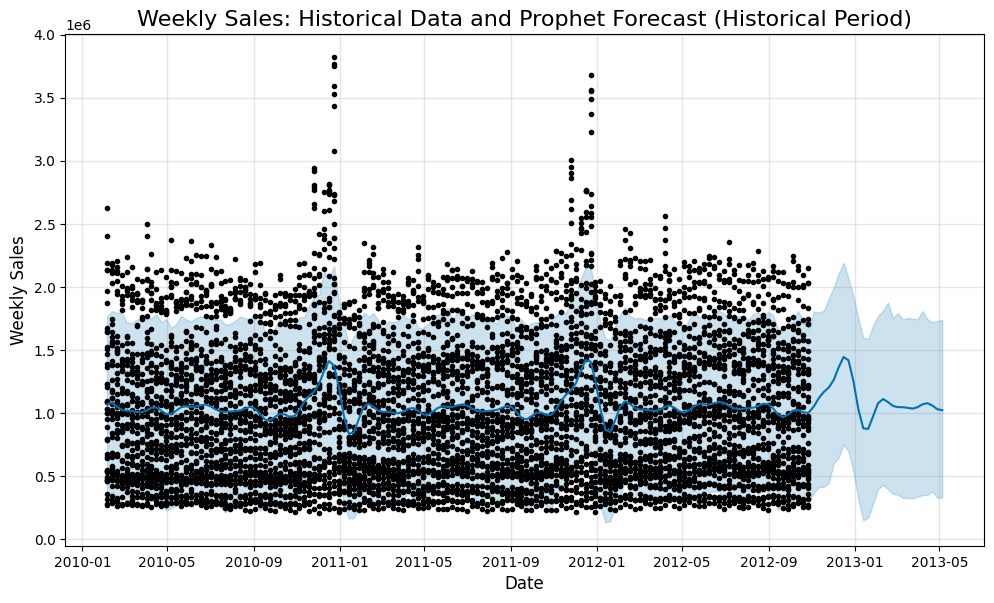

In [35]:
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Weekly Sales: Historical Data and Prophet Forecast (Historical Period)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Weekly Sales', fontsize=12)
plt.show()

In [34]:
future = model.make_future_dataframe(periods=28, freq='W')
forecast = model.predict(future)
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

,ds,yhat,yhat_lower,yhat_upper
0,2010-02-05,1.069100e+06,347968.852949,1.764706e+06
1,2010-02-12,1.083756e+06,376538.047892,1.809651e+06
2,2010-02-19,1.052644e+06,333257.154014,1.795317e+06
3,2010-02-26,1.025649e+06,340171.369385,1.796252e+06
4,2010-03-05,1.019519e+06,294808.153119,1.716766e+06


In [33]:
merged_df_train = pd.merge(prophet_df, forecast[['ds', 'yhat']], on='ds', how='inner')
merged_df_train = merged_df_train.dropna()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_train = mean_absolute_error(merged_df_train['y'], merged_df_train['yhat'])
rmse_train = np.sqrt(mean_squared_error(merged_df_train['y'], merged_df_train['yhat']))
r2_train = r2_score(merged_df_train['y'], merged_df_train['yhat'])

print(f'Mean Absolute Error (MAE) on training data: {mae_train:.2f}')
print(f'Root Mean Squared Error (RMSE) on training data: {rmse_train:.2f}')
print(f'R2 Score on training data: {r2_train:.2f}')

Mean Absolute Error (MAE) on training data: 464529.85
Root Mean Squared Error (RMSE) on training data: 556715.94
R2 Score on training data: 0.03


In [15]:
prophet_df = df[['Date', 'Weekly_Sales']]
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})
display(prophet_df.head())

,ds,y
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


**Reasoning**:
Instantiate the Prophet model and fit it to the prepared data.



In [16]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpno0ubgmh/2vty8oiy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpno0ubgmh/14as7dwr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22164', 'data', 'file=/tmp/tmpno0ubgmh/2vty8oiy.json', 'init=/tmp/tmpno0ubgmh/14as7dwr.json', 'output', 'file=/tmp/tmpno0ubgmh/prophet_modelbxmm71vu/prophet_model-20250921103025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:30:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:30:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
future = model.make_future_dataframe(periods=28, freq='W')
display(future.head())

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05


In [18]:
forecast = model.predict(future)
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

,ds,yhat,yhat_lower,yhat_upper
0,2010-02-05,1.069100e+06,311574.033872,1.824241e+06
1,2010-02-12,1.083756e+06,355344.064681,1.807896e+06
2,2010-02-19,1.052644e+06,352701.581670,1.764577e+06
3,2010-02-26,1.025649e+06,296529.019645,1.757417e+06
4,2010-03-05,1.019519e+06,305855.458048,1.751814e+06


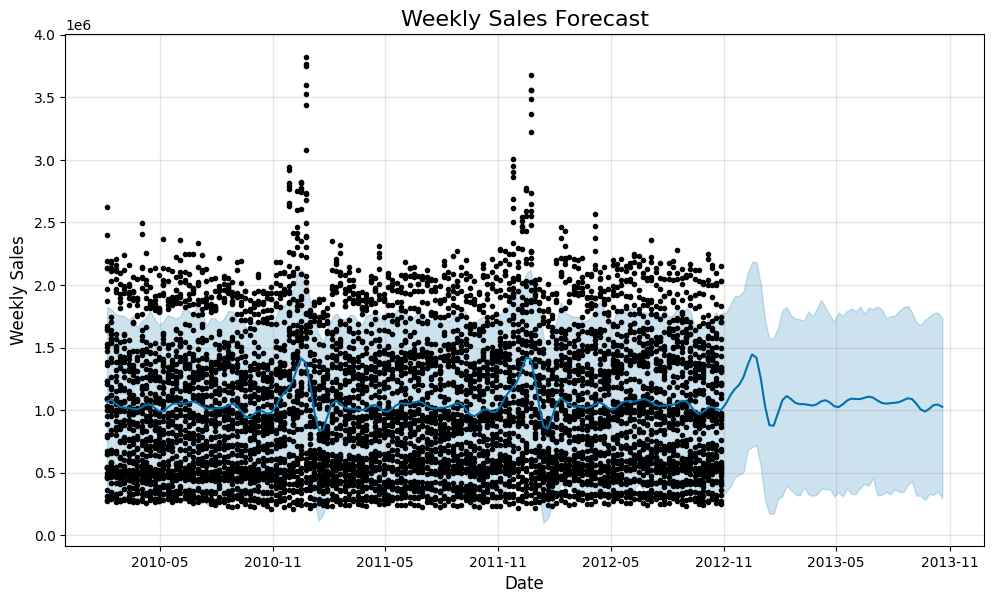

In [19]:
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Weekly Sales Forecast', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Weekly Sales', fontsize=12)
plt.show()

In [27]:
merged_df = pd.merge(df[['Date', 'Weekly_Sales']], forecast[['ds', 'yhat']], left_on='Date', right_on='ds', how='inner')
merged_df = merged_df.dropna()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(merged_df['Weekly_Sales'], merged_df['yhat'])
rmse = np.sqrt(mean_squared_error(merged_df['Weekly_Sales'], merged_df['yhat']))
r2 = r2_score(merged_df['Weekly_Sales'], merged_df['yhat'])

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Absolute Error (MAE): 464529.85
Root Mean Squared Error (RMSE): 556715.94
R2 Score: 0.03


## Summary:

### Data Analysis Key Findings

*   The Prophet model was successfully initialized and fitted to the weekly sales data.
*   A future dataframe was generated, extending 52 weeks beyond the last historical date.
*   Forecasts were generated for these future dates, including predicted values and uncertainty intervals.
*   The forecast visualization showed the trend and predicted sales over time.
*   The Mean Absolute Error (MAE) of the model on the historical data is calculated as \$464,529.85.
*   The Root Mean Squared Error (RMSE) of the model on the historical data is calculated as \$556,715.94.

### Insights or Next Steps

*   The MAE and RMSE values provide a quantitative measure of the model's performance. Further investigation might be needed to determine if these error levels are acceptable for the business context.
*   Consider exploring additional Prophet features, such as incorporating holidays or other special events, to potentially improve forecast accuracy.


In [28]:
# Define major holidays
super_bowl = pd.DataFrame({
    'holiday': 'super_bowl',
    'ds': pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08']),
    'lower_window': 0,
    'upper_window': 1,
})
labor_day = pd.DataFrame({
    'holiday': 'labor_day',
    'ds': pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']),
    'lower_window': 0,
    'upper_window': 1,
})
thanksgiving = pd.DataFrame({
    'holiday': 'thanksgiving',
    'ds': pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']),
    'lower_window': -1,
    'upper_window': 0,
})
christmas = pd.DataFrame({
    'holiday': 'christmas',
    'ds': pd.to_datetime(['2010-12-24', '2011-12-23', '2012-12-21', '2013-12-27']),
    'lower_window': -1,
    'upper_window': 1,
})

all_holidays = pd.concat((super_bowl, labor_day, thanksgiving, christmas))

# Re-initialize and fit Prophet model with holidays
model_with_holidays = Prophet(holidays=all_holidays)
model_with_holidays.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpno0ubgmh/x25l7ddg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpno0ubgmh/xl_fnfpy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15990', 'data', 'file=/tmp/tmpno0ubgmh/x25l7ddg.json', 'init=/tmp/tmpno0ubgmh/xl_fnfpy.json', 'output', 'file=/tmp/tmpno0ubgmh/prophet_modelf7novr60/prophet_model-20250921104215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:42:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
future_with_holidays = model_with_holidays.make_future_dataframe(periods=28, freq='W')
forecast_with_holidays = model_with_holidays.predict(future_with_holidays)
display(forecast_with_holidays[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

,ds,yhat,yhat_lower,yhat_upper
0,2010-02-05,1.037016e+06,353442.294748,1.769545e+06
1,2010-02-12,1.080657e+06,423723.363820,1.800989e+06
2,2010-02-19,1.059668e+06,421005.983748,1.764406e+06
3,2010-02-26,1.046046e+06,323525.965845,1.731536e+06
4,2010-03-05,1.023329e+06,312135.767396,1.719214e+06


In [30]:
merged_df_holidays = pd.merge(df[['Date', 'Weekly_Sales']], forecast_with_holidays[['ds', 'yhat']], left_on='Date', right_on='ds', how='inner')
merged_df_holidays = merged_df_holidays.dropna()

mae_holidays = mean_absolute_error(merged_df_holidays['Weekly_Sales'], merged_df_holidays['yhat'])
rmse_holidays = np.sqrt(mean_squared_error(merged_df_holidays['Weekly_Sales'], merged_df_holidays['yhat']))
r2_holidays = r2_score(merged_df_holidays['Weekly_Sales'], merged_df_holidays['yhat'])

print(f'Mean Absolute Error (MAE) with holidays: {mae_holidays:.2f}')
print(f'Root Mean Squared Error (RMSE) with holidays: {rmse_holidays:.2f}')
print(f'R2 Score with holidays: {r2_holidays:.2f}')

Mean Absolute Error (MAE) with holidays: 462316.98
Root Mean Squared Error (RMSE) with holidays: 552619.50
R2 Score with holidays: 0.04


In [31]:
merged_df_holidays_train = pd.merge(prophet_df, forecast_with_holidays[['ds', 'yhat']], on='ds', how='inner')
merged_df_holidays_train = merged_df_holidays_train.dropna()

mae_holidays_train = mean_absolute_error(merged_df_holidays_train['y'], merged_df_holidays_train['yhat'])
rmse_holidays_train = np.sqrt(mean_squared_error(merged_df_holidays_train['y'], merged_df_holidays_train['yhat']))
r2_holidays_train = r2_score(merged_df_holidays_train['y'], merged_df_holidays_train['yhat'])

print(f'Mean Absolute Error (MAE) with holidays on training data: {mae_holidays_train:.2f}')
print(f'Root Mean Squared Error (RMSE) with holidays on training data: {rmse_holidays_train:.2f}')
print(f'R2 Score with holidays on training data: {r2_holidays_train:.2f}')

Mean Absolute Error (MAE) with holidays on training data: 462316.98
Root Mean Squared Error (RMSE) with holidays on training data: 552619.50
R2 Score with holidays on training data: 0.04
